Loading and Visualizing Data ...

Mounted at /content/drive


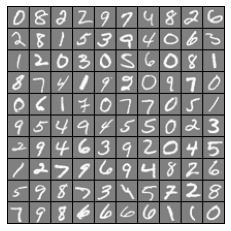

Program paused. Press enter to continue.



In [1]:
## Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions
#  in this exericse:
#
#     lrCostFunction.m (logistic regression cost function)
#     oneVsAll.m
#     predictOneVsAll.m
#     predict.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

## Initialization
#clear ; close all; clc

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.io import loadmat


import math


def displayData(X, example_width=None):
#DISPLAYDATA Display 2D data in a nice grid
#   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
#   stored in X in a nice grid. It returns the figure handle h and the 
#   displayed array if requested.



	# Set example_width automatically if not passed in
	if not example_width or not 'example_width' in locals():
		example_width = int(round(math.sqrt(X.shape[1])))

	# Gray Image
	plt.set_cmap("gray")

	# Compute rows, cols
	m, n = X.shape
	example_height = int(n/example_width)

	# Compute number of items to display
	display_rows = int(math.floor(math.sqrt(m)))
	display_cols = int(math.ceil(m/display_rows))

	# Between images padding
	pad = 1

	# Setup blank display
	display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))

	# Copy each example into a patch on the display array
	curr_ex = 1
	for j in range(1,display_rows+1):
		for i in range (1,display_cols+1):
			if curr_ex > m:
				break
		
			# Copy the patch
			
			# Get the max value of the patch to normalize all examples
			max_val = max(abs(X[curr_ex-1, :]))
			rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
			cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))

			display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
			curr_ex += 1
	
		if curr_ex > m:
			break

	# Display Image
	h = plt.imshow(display_array, vmin=-1, vmax=1)

	# Do not show axis
	plt.axis('off')

	plt.show(block=False)

	return h, display_array




## Setup the parameters you will use for this part of the exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10
                          # (note that we have mapped "0" to label 10)

## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...\n')

from google.colab import drive 
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)
data =scipy.io.loadmat('/content/drive/My Drive/ex3data1.mat') # training data stored in arrays X, y


X, y = data['X'], data['y'].ravel()
# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

#m = size(X, 1) #in octave
m = y.size


# Randomly select 100 data points to display
rand_indices = np.random.choice(m,100,replace=False)
sel = X[rand_indices, :]

displayData(sel)

print('Program paused. Press enter to continue.\n')
#pause
#input()








In [ ]:

function [J, grad] = lrCostFunction(theta, X, y, lambda)
%LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
%regularization
%   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
%   theta as the parameter for regularized logistic regression and the
%   gradient of the cost w.r.t. to the parameters. 

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the cost of a particular choice of theta.
%               You should set J to the cost.
%               Compute the partial derivatives and set grad to the partial
%               derivatives of the cost w.r.t. each parameter in theta
%
% Hint: The computation of the cost function and gradients can be
%       efficiently vectorized. For example, consider the computation
%
%           sigmoid(X * theta)
%
%       Each row of the resulting matrix will contain the value of the
%       prediction for that example. You can make use of this to vectorize
%       the cost function and gradient computations. 
%
% Hint: When computing the gradient of the regularized cost function, 
%       there're many possible vectorized solutions, but one solution
%       looks like:
%           grad = (unregularized gradient for logistic regression)
%           temp = theta; 
%           temp(1) = 0;   % because we don't add anything for j = 0  
%           grad = grad + YOUR_CODE_HERE (using the temp variable)
%


J = (1/m) * (sum(-y.*log(sigmoid(X*theta)) - ((1-y).*log(1-(sigmoid(X*theta)))) + (lambda/(2*m)) * sum(theta(2:end).^2)));

grad(1) = (1/m)*(X(:,1)' * (sigmoid(X*theta)-y));
grad(2:end) = ((1/m)*(X(:,2:end)' * (sigmoid(X*theta)-y))) + (lambda/m)*theta(2:end);




% =============================================================

grad = grad(:);










# ============ Part 2a: Vectorize Logistic Regression ============
#  In this part of the exercise, you will reuse your logistic regression
#  code from the last exercise. You task here is to make sure that your
#  regularized logistic regression implementation is vectorized. After
#  that, you will implement one-vs-all classification for the handwritten
#  digit dataset.


# Test case for lrCostFunction
print('\nTesting lrCostFunction() with regularization')

theta_t = np.array([-2, -1, 1, 2])

X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)
y_t = np.array([1,0,1,0,1])
lambda_t = 3
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('\nCost:', J);
print('Expected cost: 2.534819\n')
print('Gradients:')
print(grad)
print('Expected gradients:\n')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')

print('Program paused. Press enter to continue.\n')
#pause


Testing lrCostFunction() with regularization


NameError: ignored